In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [7]:
df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

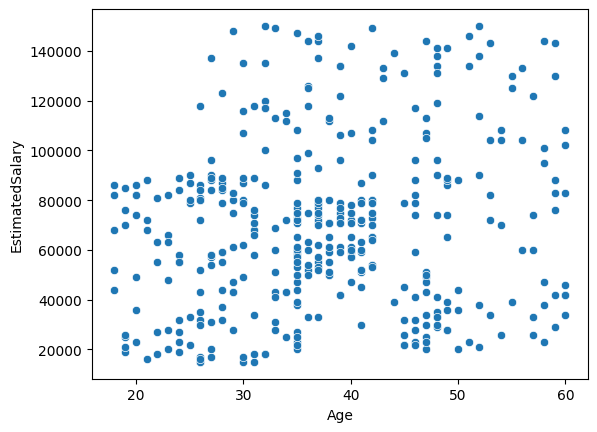

In [9]:
import seaborn as sns
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'])

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5346 - loss: 150.5333 - val_accuracy: 0.6000 - val_loss: 27.3041
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4606 - loss: 70.8750 - val_accuracy: 0.4000 - val_loss: 85.9675
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5087 - loss: 88.6459 - val_accuracy: 0.4000 - val_loss: 139.4799
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5432 - loss: 67.5596 - val_accuracy: 0.6000 - val_loss: 28.5738
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5667 - loss: 41.2132 - val_accuracy: 0.6125 - val_loss: 2.6855
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4633 - loss: 76.1945 - val_accuracy: 0.4000 - val_loss: 55.3235
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5211 - loss: 33.1903 - val_accuracy: 0.6000 - val_loss: 17.5991
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5642 - loss: 26.5383 - val_acc

this becuase of the normalistion is done

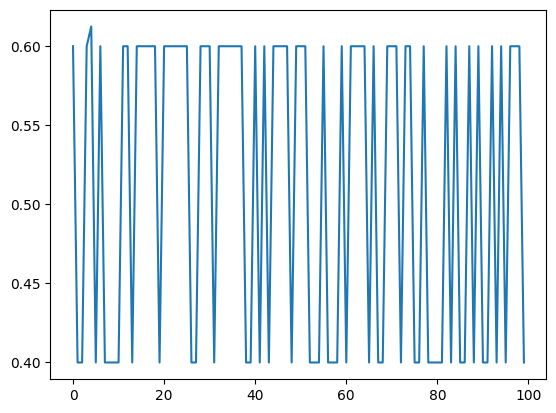

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

for that we use sscalingthe features

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

<Axes: >

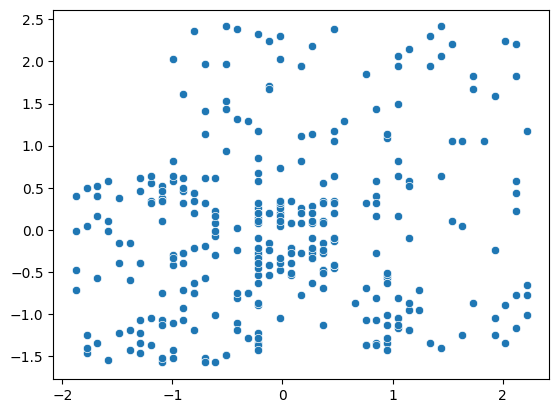

In [44]:
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1])

In [64]:
model1=Sequential()
model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

In [65]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
history1=model1.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5444 - loss: 0.6932 - val_accuracy: 0.8000 - val_loss: 0.6463
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8321 - loss: 0.6353 - val_accuracy: 0.8125 - val_loss: 0.5967
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8377 - loss: 0.5839 - val_accuracy: 0.8125 - val_loss: 0.5581
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8539 - loss: 0.5531 - val_accuracy: 0.8125 - val_loss: 0.5258
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8647 - loss: 0.5087 - val_accuracy: 0.8250 - val_loss: 0.4988
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8797 - loss: 0.4647 - val_accuracy: 0.8250 - val_loss: 0.4751
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8759 - loss: 0.4550 - val_accuracy: 0.8375 - val_loss: 0.4542
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8463 - loss: 0.4389 - val_accuracy: 0.

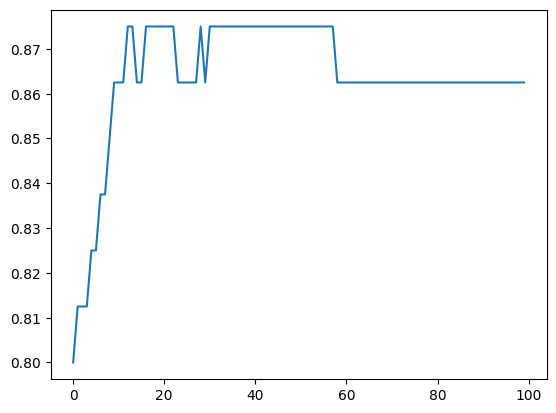

In [67]:
plt.plot(history1.history['val_accuracy'])

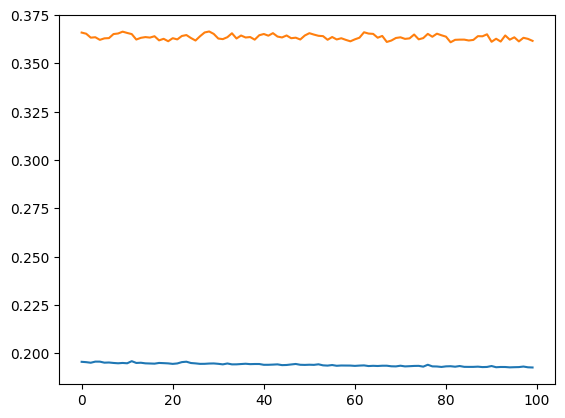

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

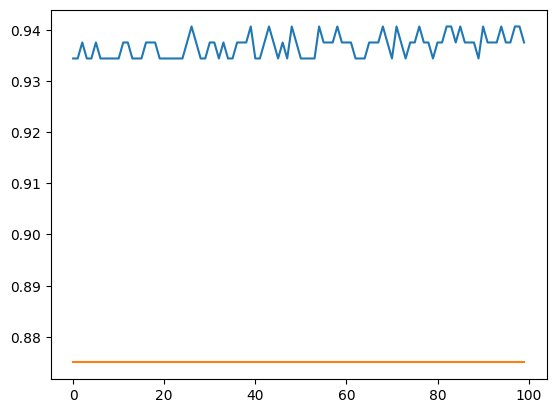

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])